In [1]:
import importlib
import utils
importlib.reload(utils)
from utils import load_data, CLASSES, IMG_SIZE, data_augmentation, evaluate_model
import numpy as np
data, labels = load_data("./Dataset")


In [2]:
# save data and labels
importlib.reload(utils)
from pathlib import Path
from utils import save_imgs
save_imgs(Path('Dataset-ResNet'),data,labels)

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)
train_generator = train_datagen.flow_from_directory('./Dataset-ResNet', class_mode='categorical', subset='training')
valid_generator = train_datagen.flow_from_directory('./Dataset-ResNet', class_mode='categorical', subset='validation')

Found 784 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [4]:
resnet_weights_path = './resnet50-0676ba61.pth'

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to use CPU only

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(2, activation='softmax'))

# Say not to train the first layer (ResNet) model as it is already trained
model.layers[0].trainable = False


2023-05-20 14:24:39.191049: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-20 14:24:39.191090: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ahmed-Nitro-AN515-44): /proc/driver/nvidia/version does not exist
2023-05-20 14:24:39.192823: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(generator=train_generator,epochs=20,validation_data=valid_generator)

/tmp/ipykernel_38146/2543279341.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,epochs=20,validation_data=valid_generator)


Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.4212 - accuracy: 0.8163 - val_loss: 0.2812 - val_accuracy: 0.9130
Epoch 2/20
25/25 [==============================] - 42s 2s/step - loss: 0.1219 - accuracy: 0.9592 - val_loss: 0.1871 - val_accuracy: 0.9420
Epoch 3/20
25/25 [==============================] - 41s 2s/step - loss: 0.0921 - accuracy: 0.9783 - val_loss: 0.1671 - val_accuracy: 0.9493
Epoch 4/20
25/25 [==============================] - 42s 2s/step - loss: 0.0699 - accuracy: 0.9834 - val_loss: 0.1685 - val_accuracy: 0.9493
Epoch 5/20
25/25 [==============================] - 41s 2s/step - loss: 0.0606 - accuracy: 0.9834 - val_loss: 0.1874 - val_accuracy: 0.9203
Epoch 6/20
25/25 [==============================] - 42s 2s/step - loss: 0.0512 - accuracy: 0.9911 - val_loss: 0.1530 - val_accuracy: 0.9565
Epoch 7/20
25/25 [==============================] - 43s 2s/step - loss: 0.0444 - accuracy: 0.9936 - val_loss: 0.1541 - val_accuracy: 0.9565
Epoch 8/20
25/25 [==

## Evaluate Model

In [7]:
import numpy as np

valid_data = []
valid_labels = []

valid_generator.reset()  # Reset the generator to start from the beginning

for _ in range(len(valid_generator)):
    batch_data, batch_labels = valid_generator.next()
    valid_data.append(batch_data)
    valid_labels.append(batch_labels)

valid_data = np.concatenate(valid_data)
valid_labels = np.concatenate(valid_labels)


Accuracy:  0.9637681159420289
F1 score:  0.9637509850275807
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.94      0.99      0.96        69

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



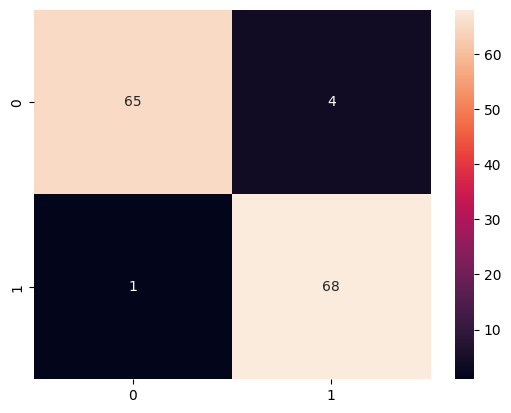

In [8]:
# get validation data from  generator
x_val, y_val = next(valid_generator)


importlib.reload(utils)
from utils import evaluate_model

evaluate_model(model, valid_data, valid_labels)